<a href="https://colab.research.google.com/github/brenofk/Colab/blob/main/Atv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando o módulo 'files' do pacote 'google.colab'. Permite que seja feito upload de arquivos do pc local.**

In [72]:
from google.colab import files
import pandas as pd


In [ ]:
import chardet

In [ ]:
file_path = 'STI_MOVIMENTO_2024_07.csv'

**Instalando a biblioteca 'chardet', que é usada para detectar a codificação do arquivo.**

In [ ]:
!pip install chardet

**Importando as bibliotecas necessárias para detectar a codificação e ler o arquivo csv.**


In [ ]:
import chardet
import pandas as pd

**Especificar o caminho do arquivo CSV.**

In [ ]:
file_path = 'STI_MOVIMENTO_2024_07.csv'

**Detecção da Codificação do Arquivo.**

In [ ]:
try:
    with open(file_path, 'rb') as f:
        raw_data = f.read()

        if not raw_data:
            raise ValueError("O arquivo está vazio.")

        result = chardet.detect(raw_data)
        encoding_detected = result.get('encoding')

        if not encoding_detected:
            raise ValueError("Não foi possível detectar a codificação do arquivo.")

        print(f"Codificação detectada: {encoding_detected}")

except FileNotFoundError:
    print(f"O arquivo {file_path} não foi encontrado.")
    encoding_detected = None
except Exception as e:
    print(f"Erro ao detectar a codificação do arquivo: {e}")
    encoding_detected = None

Codificação detectada: ISO-8859-1


**Leitura do arquivo com a decodificação detectada.**

In [68]:
if encoding_detected:
    try:
        df = pd.read_csv(file_path, encoding=encoding_detected)
        print("Arquivo lido com sucesso.")

        # Exibir as primeiras linhas do DataFrame
        print(df.head())
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")

        # Tentar diferentes codificações comuns
        for enc in ['utf-8', 'latin1', 'iso-8859-1', 'utf-16']:
            try:
                df = pd.read_csv(file_path, encoding=enc)
                print(f"Arquivo lido com sucesso usando a codificação {enc}.")
                print(df.head())
                break
            except Exception as inner_e:
                print(f"Erro ao tentar ler o arquivo com a codificação {enc}: {inner_e}")
else:
    print("A leitura do arquivo não foi possível devido a erros anteriores.")

Arquivo lido com sucesso.
  UF_ATENDIMENTO;TIPO;CLASSIFICACAO;NACIONALIDADE;TOTAL
0  AC;ENTRADA;PERMANENTE;ANGOLA                  ...   
1  AC;ENTRADA;PERMANENTE;BANGLADESH              ...   
2  AC;ENTRADA;PERMANENTE;BOLÍVIA                 ...   
3  AC;ENTRADA;PERMANENTE;CHILE                   ...   
4  AC;ENTRADA;PERMANENTE;COLÔMBIA                ...   


**Lendo arquivo CSV com delimitador (;).**

In [73]:
df = pd.read_csv(file_path, sep=';', encoding='ISO-8859-1')

**Listar todas as colunas do DataFrame.**

In [75]:
print("Colunas do DataFrame:", df.columns)

Colunas do DataFrame: Index(['UF_ATENDIMENTO', 'TIPO', 'CLASSIFICACAO', 'NACIONALIDADE', 'TOTAL'], dtype='object')


**Tipos de dados das colunas.**

In [76]:
print("Tipos de dados das colunas:")
print(df.dtypes)

Tipos de dados das colunas:
UF_ATENDIMENTO    object
TIPO              object
CLASSIFICACAO     object
NACIONALIDADE     object
TOTAL             object
dtype: object


**Selecionando colunas especificas.**

In [78]:
selected_columns = df[['UF_ATENDIMENTO', 'TIPO', 'CLASSIFICACAO']]

# Exibir as primeiras linhas das colunas selecionadas
print(selected_columns.head())


  UF_ATENDIMENTO     TIPO CLASSIFICACAO
0             AC  ENTRADA    PERMANENTE
1             AC  ENTRADA    PERMANENTE
2             AC  ENTRADA    PERMANENTE
3             AC  ENTRADA    PERMANENTE
4             AC  ENTRADA    PERMANENTE


**Filtrar dados onde a coluna 'UF' é igual a 'PR'.**

In [82]:
parana_data = df[df['UF_ATENDIMENTO'] == 'PR']

# Exibir as primeiras linhas do DataFrame filtrado
print(parana_data.head())

     UF_ATENDIMENTO     TIPO CLASSIFICACAO  \
4156             PR  ENTRADA    PERMANENTE   
4157             PR  ENTRADA    PERMANENTE   
4158             PR  ENTRADA    PERMANENTE   
4159             PR  ENTRADA    PERMANENTE   
4160             PR  ENTRADA    PERMANENTE   

                                 NACIONALIDADE TOTAL  
4156  ALEMANHA                                    11  
4157  ARGENTINA                                  402  
4158  AUSTRÁLIA                                    2  
4159  BOLÍVIA                                     25  
4160  BULGÁRIA                                     1  


**Filtra os dados onde a coluna 'TIPO' é igual a 'ENTRADA'.**

In [84]:
filtered_df = df[df['TIPO'] == 'ENTRADA']

# Exibir as primeiras linhas do DataFrame filtrado
print(filtered_df.head())

  UF_ATENDIMENTO     TIPO CLASSIFICACAO  \
0             AC  ENTRADA    PERMANENTE   
1             AC  ENTRADA    PERMANENTE   
2             AC  ENTRADA    PERMANENTE   
3             AC  ENTRADA    PERMANENTE   
4             AC  ENTRADA    PERMANENTE   

                              NACIONALIDADE TOTAL  
0  ANGOLA                                       1  
1  BANGLADESH                                   3  
2  BOLÍVIA                                     29  
3  CHILE                                        1  
4  COLÔMBIA                                     1  


**Conta a frequencia dos valores da coluna NACIONALIDADE**

In [99]:
nacionalidade_counts = df['NACIONALIDADE'].value_counts()

**Exibe a nacionalidade do maior para o menor.**

In [104]:
print('Nacionalidade maior para o menor: ' , nacionalidade_counts )

Nacionalidade maior para o menor:  NACIONALIDADE
ARGENTINA                                   263
FRANÇA                                      242
PORTUGAL                                    236
ESTADOS UNIDOS                              235
ESPANHA                                     213
                                           ... 
SAN MARINO                                    1
ANTILHAS HOLANDESAS                           1
LAOS                                          1
GUIANA FRANCESA                               1
TUVALU                                        1
Name: count, Length: 198, dtype: int64


**AAAAAAAA**

In [125]:
uf_atendimento_unicos = df['UF_ATENDIMENTO'].unique()

print("Todas as UFs de Atendimento:")
for uf in uf_atendimento_unicos:
    print(uf)

Todas as UFs de Atendimento:
AC
AL
AM
AP
BA
CE
DF
ES
GO
MA
MG
MS
MT
PA
PB
PE
PI
PR
RJ
RN
RO
RR
RS
SC
SE
SP


In [107]:
# Outra forma de filtrar as nacionalidades. Esse filtro mostra todas as nacionalidade mesmo quando os numeros sao repetidos.
# print("Nacionalidades e suas quantidades (do maior para o menor):")
# for nacionalidade, count in nacionalidade_counts.items():
    #print(f"{nacionalidade}: {count}")

**Fazendo filtro por estados.**

In [130]:
estado_counts = df.groupby('UF_ATENDIMENTO')['NACIONALIDADE'].value_counts()

# Filtrar os dados para o estado específico.
estado_filtrado = df[df['UF_ATENDIMENTO'] == 'PR']

# Contar a frequência de cada nacionalidade no Paraná.
nacionalidade_counts_pr = parana_data['NACIONALIDADE'].value_counts()

# Exibir a contagem de nacionalidades para o Paraná.
print("Número de imigrantes por nacionalidade em PR:")
for nacionalidade, count in nacionalidade_counts_pr.items():
    print(f"{nacionalidade}: {count}")

Número de imigrantes por nacionalidade em PR:
PARAGUAI                                : 31
ARGENTINA                               : 24
ALEMANHA                                : 19
CHILE                                   : 19
ESPANHA                                 : 19
ESTADOS UNIDOS                          : 18
FRANÇA                                  : 17
JAPÃO                                   : 16
PERU                                    : 16
COLÔMBIA                                : 15
VENEZUELA                               : 15
ITÁLIA                                  : 15
CORÉIA DO SUL                           : 14
URUGUAI                                 : 14
PAÍSES BAIXOS                           : 13
CHINA                                   : 13
TURQUIA                                 : 13
MÉXICO                                  : 12
SUÍÇA                                   : 12
PORTUGAL                                : 11
EQUADOR                                 : 10
RÚSSIA   

**CRIANDO GRAFICOS COM BASE NOS DADOS.**

**CONTANDO A FREQUENCIA DE DE CADA NACIONALIDADE NO DATAFRAME.**

In [131]:
nacionalidade_counts = df['NACIONALIDADE'].value_counts()

In [133]:
# Selecionando os 7 paieses com o maior numero de imigrantes.
sete_nacionalidades = nacionalidade_counts.head(7)

**Criando o Grafico**

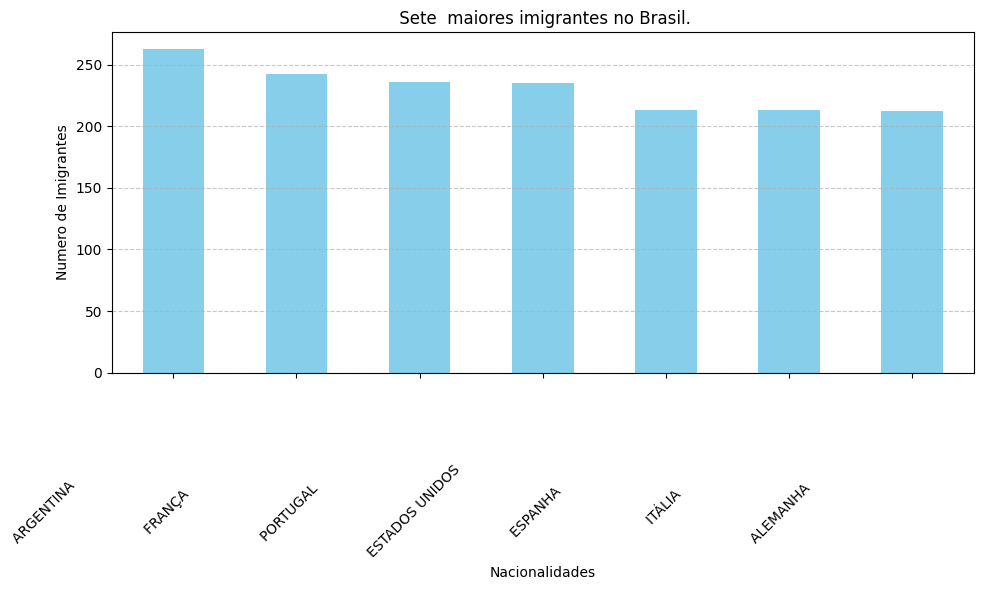

In [148]:
plt.figure(figsize = (10, 6))
sete_nacionalidades.plot(kind = 'bar', color = 'skyblue')

# Criando um titulo para o grafico.
plt.title(' Sete  maiores imigrantes no Brasil.')
# Criando titulo 'paises'.
plt.xlabel('Nacionalidades')
# Criando titulo 'numero de imigrantes'.
plt.ylabel('Numero de Imigrantes')
# organizando os nomes dos paises de forma 45 grus p/ direit
plt.xticks(rotation = 45, ha = 'right')
plt.grid( axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()

plt.show()